## Regresión logística

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [128]:
# Data extracted from https://archive.ics.uci.edu/ml/datasets/Glass+Identification
df_headers = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "glass-type"]
df = pd.read_csv("glass.data", names = df_headers)
'''
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps
'''


'\n1. Id number: 1 to 214\n2. RI: refractive index\n3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)\n4. Mg: Magnesium\n5. Al: Aluminum\n6. Si: Silicon\n7. K: Potassium\n8. Ca: Calcium\n9. Ba: Barium\n10. Fe: Iron\n11. Type of glass: (class attribute)\n-- 1 building_windows_float_processed\n-- 2 building_windows_non_float_processed\n-- 3 vehicle_windows_float_processed\n-- 4 vehicle_windows_non_float_processed (none in this database)\n-- 5 containers\n-- 6 tableware\n-- 7 headlamps\n'

In [129]:
df.head(10)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass-type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [130]:
df["glass-type"].unique()



array([1, 2, 3, 5, 6, 7])

In [131]:
categories = ('building_windows_float_processed','building_windows_non_float_processed','vehicle_windows_float_processed','containers','tableware','headlamps')

Text(0, 0.5, 'Al')

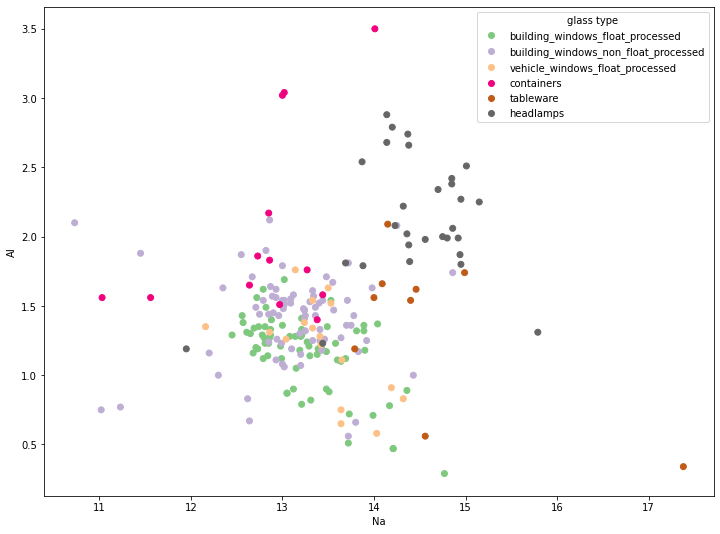

In [132]:
plt.figure(figsize=(12,9))
scatter = plt.scatter(df["Na"], df["Al"], c = df["glass-type"], cmap = 'Accent')
plt.legend(handles = scatter.legend_elements()[0], 
           labels = categories,
           title  ="glass type")
plt.xlabel("Na")
plt.ylabel("Al")

In [133]:
'''
Separa X e y usando iloc
'''
X = df.iloc[:,1:10]
y = df.iloc[:,-1]

In [134]:
'''
Busca en internet train_test_split y divide X e y en Entrenamiento y Test: X_train, X_test, y_train, y_test
con 70% para entrenamiento y 30% para test
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)



In [135]:
'''
Crea un modelo de regresión logística y entrénalo
'''
# Fit (train) the Logistic Regression classifier
clf = linear_model.LogisticRegression()
#clf = linear_model.LogisticRegression(C=1e40, solver='newton-cg')
clf.fit(X_train, y_train)

# Test
print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)
y_pred_train = clf.predict(X_train)
metrics.r2_score(y_train, y_pred_train)

Coefficients:  [[-0.00614997 -0.63321668  1.53055047 -1.17554808  0.03538867 -0.2390146
   0.48301504 -0.16547597 -0.09028609]
 [ 0.02748671 -0.23974786  0.47967244  0.53502736 -0.01621683  0.46076798
   0.42754206 -0.45021435  0.25621419]
 [ 0.01346794  0.40671159  1.12827613 -0.55285649 -0.15367449 -0.32948636
   0.4065177  -0.13934375 -0.01153366]
 [-0.01889717 -1.10903412 -0.93345351  0.55580524  0.20393097  0.06475621
   0.09333875 -0.04255584  0.0132436 ]
 [-0.0207278   0.92398816 -0.74144338 -0.05640108 -0.09791478 -0.55958819
  -0.39525794 -0.1783424  -0.08856488]
 [ 0.00482029  0.65129891 -1.46360215  0.69397305  0.02848645  0.60256495
  -1.01515561  0.9759323  -0.07907315]]
Intercept:  [-0.00727773  0.02015876  0.01084548 -0.01273734 -0.01369116  0.002702  ]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5880259969156202

In [136]:
X_test.shape

(65, 9)

In [137]:
''' 
Haz predicciones para X_test
'''
y_pred = clf.predict(X_test)

In [138]:
'''
y calcula la exactitud del modelo con metrics.accuracy_score() para X_train e y_train
'''
print('Train: ',metrics.accuracy_score(y_train,clf.predict(X_train)))
print('Test: ',metrics.accuracy_score(y_test, y_pred))


Train:  0.6241610738255033
Test:  0.6307692307692307
